In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [4]:
#importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input


In [5]:
#To ensure the gpu is present
physical_devices=tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print('GPU is available')
else:
  print('GPU is not available')

GPU is available


In [6]:
train_dir='/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
val_dir='/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'
test_dir='/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'

In [7]:
classes=os.listdir(train_dir)
num_classes=len(classes)
print(num_classes)
print(classes)

2
['nofire', 'fire']


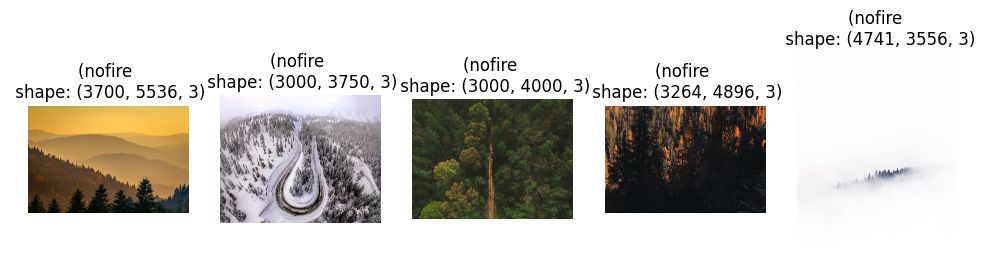

In [8]:
#lets visualize the image in dataset
plt.figure(figsize=(12,10))
for i in range(5):
  class_path=os.path.join(train_dir,classes[0])
  img_name=os.listdir(class_path)[i]
  img_path=os.path.join(class_path,img_name)
  img=plt.imread(img_path)
  plt.subplot(1,5,i+1)

  plt.subplot(1,5,i+1)
  plt.imshow(img)
  plt.title(f'({classes[0]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

In [9]:
#Image Generation and Batch Size
batch_size=32
image_size=(224,224)

train_datagen=ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

#Image Generation and Batch Size
batch_size=32
image_size=(224,224)

train_datagen=ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

val_generator=val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [10]:
#map indices
class_mapping=train_generator.class_indices
print(class_mapping)
class_names=list(class_mapping.keys())
print(class_names)

{'fire': 0, 'nofire': 1}
['fire', 'nofire']


In [11]:
#build cnn model
model=Sequential([ # Change from curly braces {} to square brackets []
    Input(shape=(224,224,3)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

In [12]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,679,041 (36.92 MB)

 Trainable params: 9,679,041 (36.92 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(train_generator,
          steps_per_epoch=train_generator.samples // batch_size,
          epochs=12,
          validation_data=val_generator,
          validation_steps=val_generator.samples // batch_size)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
 4/58 ━━━━━━━━━━━━━━━━━━━━ 3:39 4s/step - accuracy: 0.4727 - loss: 0.9041

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


51/58 ━━━━━━━━━━━━━━━━━━━━ 46s 7s/step - accuracy: 0.5986 - loss: 0.6921

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


58/58 ━━━━━━━━━━━━━━━━━━━━ 504s 9s/step - accuracy: 0.6057 - loss: 0.6800 - val_accuracy: 0.7188 - val_loss: 0.5269
Epoch 2/12
 1/58 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.7812 - loss: 0.5441

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


58/58 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.7812 - loss: 0.5441 - val_accuracy: 0.7161 - val_loss: 0.5222
Epoch 3/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 513s 8s/step - accuracy: 0.7455 - loss: 0.5078 - val_accuracy: 0.7318 - val_loss: 0.5119
Epoch 4/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.7812 - loss: 0.5444 - val_accuracy: 0.7344 - val_loss: 0.4910
Epoch 5/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 510s 9s/step - accuracy: 0.7431 - loss: 0.5104 - val_accuracy: 0.7630 - val_loss: 0.4907
Epoch 6/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.7500 - loss: 0.5509 - val_accuracy: 0.7474 - val_loss: 0.5177
Epoch 7/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 497s 8s/step - accuracy: 0.7526 - loss: 0.4961 - val_accuracy: 0.7786 - val_loss: 0.4607
Epoch 8/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9062 - loss: 0.3851 - val_accuracy: 0.7760 - val_loss: 0.4505
Epoch 9/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 451s 8s/step - accuracy: 0.7753 - loss: 0.4645 - val_accuracy: 0.7865 - val_loss: 0.4413

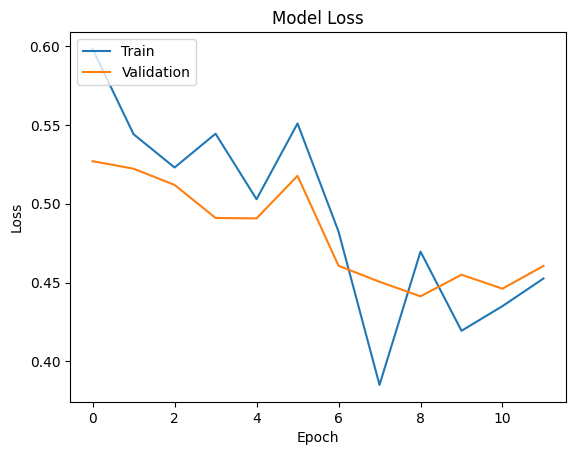

In [14]:
#evaluate the model - plotting traning and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
#

In [15]:
#evaluate model using test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (101859328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (94487082 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 89s 7s/step - accuracy: 0.7832 - loss: 0.4137


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Test Accuracy: 80.73%
Test Loss: 0.3927


In [16]:
#save the model
model.save('wildfire_model.keras')

In [32]:
#print complete path to model for downloading
os.path.abspath("wildfire_mode.keras")

'/content/wildfire_mode.keras'

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the model from the file
model = load_model('wildfire_model.keras')

#predict on new image - create a function
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    if prediction[0] > 0.5 :
        return 'No Fire'
    else:
        return 'Fire'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


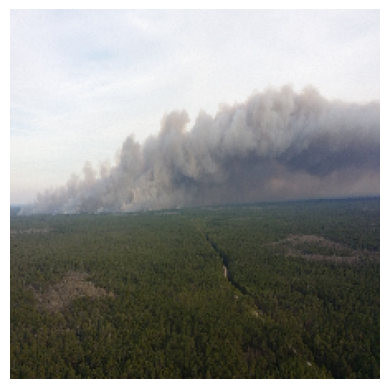

'Fire'

In [23]:
#example for Fire Image
new_image='/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train/fire/21114883420_0cf47eb43a_o.jpg'
predict_image(new_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


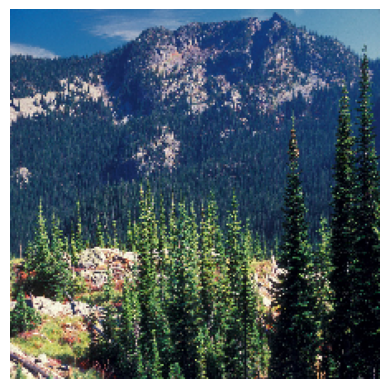

'No Fire'

In [24]:
# example for no fire image
new_image='/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train/nofire/23904765996_2b8611bf08_o.jpg'
predict_image(new_image)